## Project Title:
#### Inventory Optimization Via Demand Forecasting: Analyzing Sales Data and Market Trends using ML, MLflow and Streamlit App 
------ by Ifeoma Augusta Adigwe -----

### Project Overview:
This project focused on leveraging Python to develop and apply machine learning techniques for robust demand forecasting. By integrating MLflow for tracking and a Streamlit app for visualization, I gained hands-on experience in optimizing inventory management strategies through data-driven insights.
The primary objective was to enhance my ability to make accurate demand predictions, enabling businesses to maintain optimal stock levels, minimize costs, and improve supply chain efficiency. Throughout this journey, I worked with complex datasets, applying predictive modeling to refine inventory control based on market trends and anticipated customer demand.

### Business Overview & Problem Statement
SupplySaver Corporation faces a significant challenge in inventory optimization through demand forecasting. Several key issues contribute to this complexity:
Unpredictable Demand Trends – The company experiences fluctuating demand across different product categories, resulting in either surplus inventory or shortages.
High Storage Costs – Excess inventory leads to increased holding costs, negatively impacting profitability.
Customer Experience – Inefficient inventory management affects order fulfillment speed, potentially leading to dissatisfied customers.
Supply Chain Performance – Disruptions in inventory accuracy reduce overall supply chain efficiency, affecting timely deliveries.
Competitive Market Positioning – With logistics being a competitive industry, optimizing inventory is crucial for maintaining an edge.


### Project Objectives
This project aims to improve demand forecasting in logistics and supply chain operations with the following goals:
Cost Reduction – Implementing robust forecasting models to minimize excess inventory costs.
Improved Customer Service – Ensuring accurate stock management for seamless order fulfillment and satisfaction.
Supply Chain Optimization – Refining inventory strategies to enhance operational efficiency and reduce lead times.
Profitability Enhancement – Lowering carrying costs while boosting sales through better demand predictions.

### Data Overview
#### Three different dataset were provided
##### 1. The inventory dataset includes the following features:
- Date – Timestamp representing historical sales records.
- Product_ID – Unique identifier for each inventory item.
- Demand – Number of units requested per product on a given date.
- Seasonality - The different seasons
- Lead_time_days - 

##### 2. The historical demand dataset includes the following features:
This data serves as the foundation for analyzing inventory patterns, optimizing stock levels, and driving informed business decisions.
- Date – Timestamp representing historical sales records.
- Product_ID – Unique identifier for each inventory item.
- Demand – Number of units requested per product on a given date.

##### 3. The historical product demand dataset includes the following features:
- Product_Code – Unique identifier for each inventory item.
- Warehouse - Unique identifier for each warehouses
- Product_Category - Unique identifier for each product category
- Date -Timestamp representing historical sales records.
- Order_Demand - Number of units requested per product on a given date.

### Technology Stack
The project is implemented in Python, leveraging the following libraries:

- NumPy – For mathematical computations on data.
- Pandas – For data manipulation and analysis.
- Matplotlib & Seaborn – For data visualization and insights.
- Scikit-learn – For implementing machine learning models.
- ML Flow - for model performance tracking
- Streamlit - for forecasting visualisation

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc)


### Data Preprocessing

In [ ]:
# Load all three datasets one after the other to have an overview of each dataset

# 1. inventory dataset
# 2. historical demand dataset
# 3. historical product demand dataset

In [23]:
# 1. inventory dataset

# Define file paths
file1 = r"C:\Users\IfeomaAugustaAdigwe\Desktop\Sales_Data_and_Market_Trends\data\inventory_dataset.csv"
# Load and display inventory dataset
print("\n Loading Inventory Dataset...")
df_inventory = pd.read_csv(file1)
print(" Inventory Dataset Loaded Successfully!")
print("\n Inventory Dataset Info:")
print(df_inventory.info())
print("\n Inventory Dataset shape:")
print(df_inventory.shape)
print("\n Inventory Dataset isnull:")
print(df_inventory.isnull().sum())
print("\n Inventory Dataset Preview:")
df_inventory.head()


 Loading Inventory Dataset...
 Inventory Dataset Loaded Successfully!

 Inventory Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Product_ID      10000 non-null  int64  
 2   Demand          10000 non-null  float64
 3   Seasonality     10000 non-null  object 
 4   Lead_Time_Days  10000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB
None

 Inventory Dataset shape:
(10000, 5)

 Inventory Dataset isnull:
Date              0
Product_ID        0
Demand            0
Seasonality       0
Lead_Time_Days    0
dtype: int64

 Inventory Dataset Preview:


,Date,Product_ID,Demand,Seasonality,Lead_Time_Days
0,2021-01-30,13,66.378698,Spring,25
1,2018-08-17,89,44.821924,Winter,17
2,2021-07-01,69,23.610530,Spring,4
3,2021-03-14,34,47.615425,Fall,26
4,2022-07-05,56,72.192019,Winter,28


In [24]:
# 2. historical demand dataset

file2 = r"C:\Users\IfeomaAugustaAdigwe\Desktop\Sales_Data_and_Market_Trends\data\Historical Product Demand.csv"

# Load and display historical product demand dataset
print("\n Loading Historical Product Demand Dataset...")
df_product_demand = pd.read_csv(file2)
print(" Historical Product Demand Dataset Loaded Successfully!")
print("\n Historical Product Demand Info:")
print(df_product_demand.info())
print("\n Historical Product Demand Dataset shape:")
print(df_product_demand.shape)
print("\n Historical Product Demand Dataset isnull:")
print(df_product_demand.isnull().sum())
print("\n Historical Product Demand Preview:")
df_product_demand.head()


 Loading Historical Product Demand Dataset...
 Historical Product Demand Dataset Loaded Successfully!

 Historical Product Demand Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB
None

 Historical Product Demand Dataset shape:
(1048575, 5)

 Historical Product Demand Dataset isnull:
Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

 Historical Product Demand Preview:


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [25]:
# 3. historical product demand dataset

file3 = r"C:\Users\IfeomaAugustaAdigwe\Desktop\Sales_Data_and_Market_Trends\data\Historical Demand Data.csv"

# Load and display historical demand dataset
print("\n Loading Historical Demand Dataset...")
df_demand_data = pd.read_csv(file3)
print(" Historical Demand Dataset Loaded Successfully!")
print("\n Historical Demand Dataset Info:")
print(df_demand_data.info())
print("\n Historical Demand Dataset shape:")
print(df_demand_data.shape)
print("\n Historical Demand Dataset isnull:")
print(df_demand_data.isnull().sum())
print("\n Historical Demand Preview:")
df_demand_data.head()


 Loading Historical Demand Dataset...
 Historical Demand Dataset Loaded Successfully!

 Historical Demand Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        9140 non-null   object
 1   Product_id  9140 non-null   object
 2   Demand      9140 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 214.3+ KB
None

 Historical Demand Dataset shape:
(9140, 3)

 Historical Demand Dataset isnull:
Date          0
Product_id    0
Demand        0
dtype: int64

 Historical Demand Preview:


,Date,Product_id,Demand
0,2012-01-01,Product_001,3
1,2012-01-01,Product_002,1
2,2012-01-01,Product_003,3
3,2012-01-01,Product_004,3
4,2012-01-01,Product_005,7


### Data Cleaning

In [26]:
# Step 1: Standardize column names for consistency

df_inventory.columns = ['Date', 'Product_ID', 'Demand', 'Seasonality', 'Lead_Time_Days']
df_product_demand.columns = ['Product_ID', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand']
df_demand_data.columns = ['Date', 'Product_ID', 'Demand']

In [27]:
# Step 2: Convert 'Date' columns to datetime

df_inventory['Date'] = pd.to_datetime(df_inventory['Date'], errors='coerce')
df_product_demand['Date'] = pd.to_datetime(df_product_demand['Date'], errors='coerce')
df_demand_data['Date'] = pd.to_datetime(df_demand_data['Date'], errors='coerce')

In [28]:
# Step 3: Clean 'Order_Demand' column - remove commas, whitespace, handle negatives, and convert to numeric

df_product_demand['Order_Demand'] = df_product_demand['Order_Demand'].str.replace(r'[^\d-]', '', regex=True)
df_product_demand['Order_Demand'] = pd.to_numeric(df_product_demand['Order_Demand'], errors='coerce')

In [29]:
# Step 4: Remove rows with missing values (Date, Product_ID, Demand)

df_inventory.dropna(subset=['Date', 'Product_ID', 'Demand'], inplace=True)
df_product_demand.dropna(subset=['Date', 'Product_ID', 'Order_Demand'], inplace=True)
df_demand_data.dropna(subset=['Date', 'Product_ID', 'Demand'], inplace=True)

In [30]:
# Step 5: Align data types for merge (ensure Product_ID columns are strings)

df_inventory['Product_ID'] = df_inventory['Product_ID'].astype(str)
df_product_demand['Product_ID'] = df_product_demand['Product_ID'].astype(str)
df_demand_data['Product_ID'] = df_demand_data['Product_ID'].astype(str)

In [31]:
# Step 6: Rename Demand columns for clarity before merging

df_inventory.rename(columns={'Demand': 'Inventory_Demand'}, inplace=True)
df_demand_data.rename(columns={'Demand': 'Historical_Demand'}, inplace=True)
df_product_demand.rename(columns={'Order_Demand': 'Order_Demand_Val'}, inplace=True)

In [32]:
# Step 7: Merge datasets on ['Date', 'Product_ID']

df_merged = pd.merge(df_inventory, df_product_demand, on=['Date', 'Product_ID'], how='outer')
df_merged = pd.merge(df_merged, df_demand_data, on=['Date', 'Product_ID'], how='outer')

In [35]:
df_merged.head()

,Date,Product_ID,Inventory_Demand,Seasonality,Lead_Time_Days,Warehouse,Product_Category,Order_Demand_Val,Historical_Demand
0,2011-01-08,Product_0965,NaN,NaN,NaN,Whse_A,Category_006,2.0,NaN
1,2011-05-31,Product_1724,NaN,NaN,NaN,Whse_A,Category_003,108.0,NaN
2,2011-06-24,Product_1521,NaN,NaN,NaN,Whse_S,Category_019,85000.0,NaN
3,2011-06-24,Product_1521,NaN,NaN,NaN,Whse_S,Category_019,7000.0,NaN
4,2011-09-02,Product_1507,NaN,NaN,NaN,Whse_C,Category_019,1250.0,NaN


### Exploratory Data Analysis

In [37]:
# Set style
sns.set(style="whitegrid")

# 1. Missing Data Overview
missing_data = df_merged.isnull().mean().sort_values(ascending=False) * 100
missing_data

Historical_Demand    99.134860
Lead_Time_Days       99.053457
Inventory_Demand     99.053457
Seasonality          99.053457
Product_Category      1.811683
Order_Demand_Val      1.811683
Warehouse             1.811683
Date                  0.000000
Product_ID            0.000000
dtype: float64

C:\Users\IfeomaAugustaAdigwe\AppData\Local\Temp\ipykernel_20236\2091750509.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette="Blues_d")


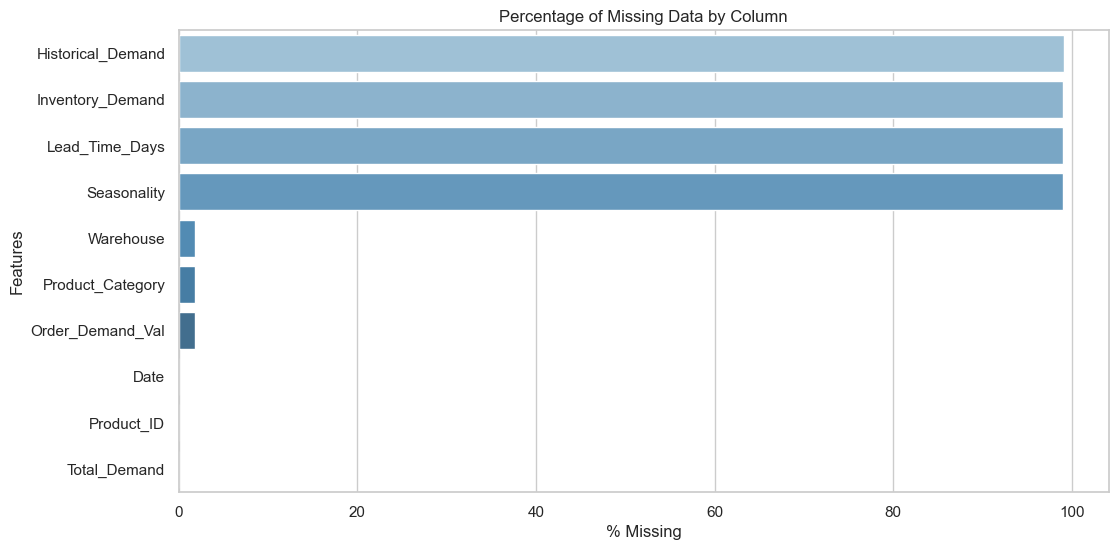

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Missing Data Overview
missing_data = df_merged.isnull().mean().sort_values(ascending=False) * 100

# Create a single figure for visualization
plt.figure(figsize=(12, 6))

# Missing Data Bar Plot
sns.barplot(x=missing_data.values, y=missing_data.index, palette="Blues_d")

# Add labels and title
plt.title("Percentage of Missing Data by Column")
plt.xlabel("% Missing")
plt.ylabel("Features")

# Show plot
plt.show()


In [39]:
# 2. Monthly Demand Trend

df_time = df_merged.copy()
df_time['Month'] = df_time['Date'].dt.to_period('M')
monthly_demand = df_time.groupby('Month')[['Inventory_Demand', 'Order_Demand_Val', 'Historical_Demand']].sum()
monthly_demand.head()

,Inventory_Demand,Order_Demand_Val,Historical_Demand
Month,,,
2011-01,0.0,2.0,0.0
2011-05,0.0,108.0,0.0
2011-06,0.0,92000.0,0.0
2011-09,0.0,6728.0,0.0
2011-10,0.0,7.0,0.0


<Figure size 1000x600 with 0 Axes>

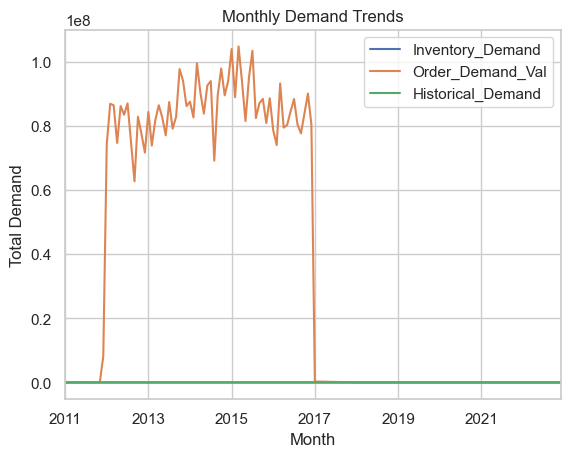

In [51]:
import matplotlib.pyplot as plt

# Create a single figure
plt.figure(figsize=(10, 6))

# Plot Monthly Demand Trends
monthly_demand.plot()
plt.title("Monthly Demand Trends")
plt.ylabel("Total Demand")
plt.xlabel("Month")

# Show plot
plt.show()


In [40]:
# 3. Seasonality Effects

seasonal_demand = df_merged.groupby('Seasonality')['Inventory_Demand'].sum().sort_values(ascending=False)
seasonal_demand

Seasonality
Summer    155734.687411
Spring    131694.469712
Winter    108811.876519
Fall       81210.933953
Name: Inventory_Demand, dtype: float64

C:\Users\IfeomaAugustaAdigwe\AppData\Local\Temp\ipykernel_20236\3233003802.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, palette="Set2")


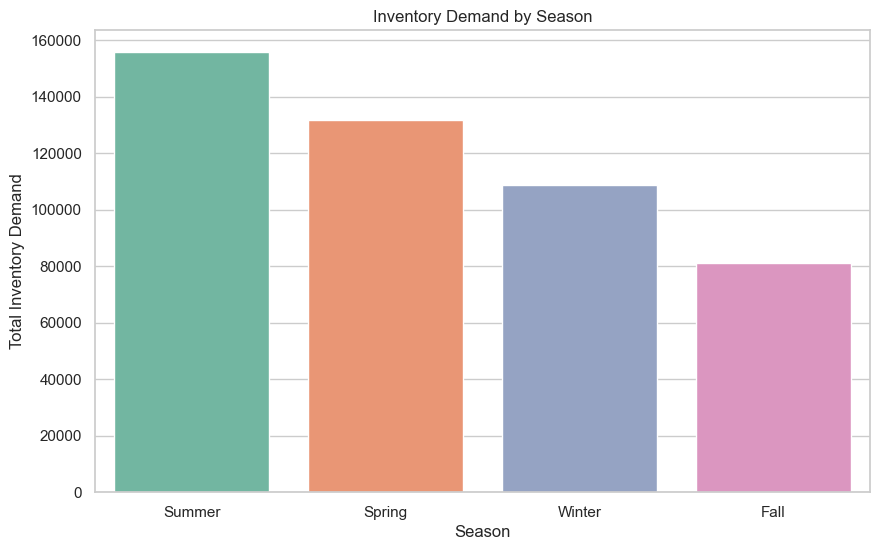

In [50]:
plt.figure(figsize=(10, 6))  

# Create bar plot
sns.barplot(x=seasonal_demand.index, y=seasonal_demand.values, palette="Set2")

# Add labels and title
plt.xlabel("Season")
plt.ylabel("Total Inventory Demand")
plt.title("Inventory Demand by Season")

# Show plot
plt.show()

In [41]:
# 4. Top Products by Demand

df_merged['Total_Demand'] = df_merged[['Inventory_Demand', 'Order_Demand_Val', 'Historical_Demand']].sum(axis=1)
top_products = df_merged.groupby('Product_ID')['Total_Demand'].sum().sort_values(ascending=False).head(10)
top_products

Product_ID
Product_1359    472474000.0
Product_1248    289117000.0
Product_0083    210651000.0
Product_1341    169777000.0
Product_1295    123303000.0
Product_1241    117741000.0
Product_1245    103537000.0
Product_1286    101566400.0
Product_1432     97207000.0
Product_1274     92831000.0
Name: Total_Demand, dtype: float64

C:\Users\IfeomaAugustaAdigwe\AppData\Local\Temp\ipykernel_20236\1499614915.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


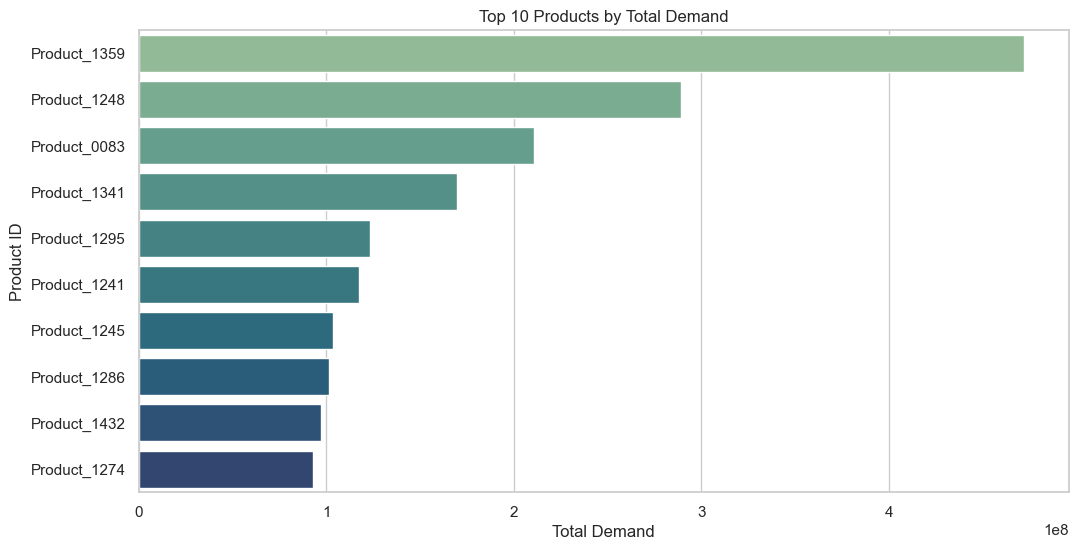

In [53]:
plt.figure(figsize=(12, 6))

# Top Products by Demand Bar Plot
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")

# Add labels and title
plt.title("Top 10 Products by Total Demand")
plt.xlabel("Total Demand")
plt.ylabel("Product ID")

# Show plot
plt.show()

In [42]:
# 5. Top Warehouses

warehouse_demand = df_merged.groupby('Warehouse')['Order_Demand_Val'].sum().sort_values(ascending=False).head(10)
warehouse_demand

Warehouse
Whse_J    3.363200e+09
Whse_S    1.038025e+09
Whse_C    5.850714e+08
Whse_A    1.478774e+08
Name: Order_Demand_Val, dtype: float64

C:\Users\IfeomaAugustaAdigwe\AppData\Local\Temp\ipykernel_20236\2394845459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=warehouse_demand.values, y=warehouse_demand.index, palette="flare")


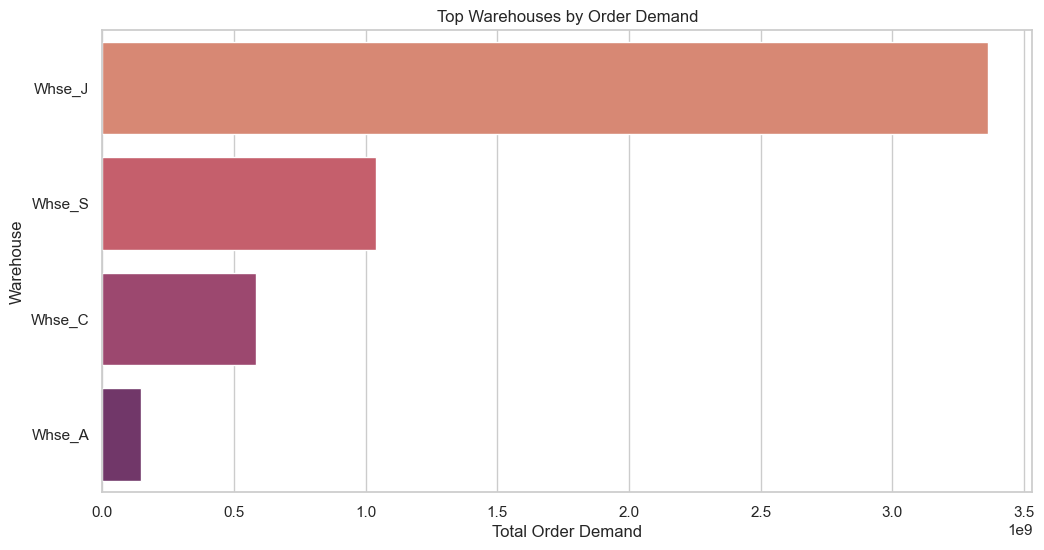

In [54]:
plt.figure(figsize=(12, 6))

# Warehouse Demand Bar Plot
sns.barplot(x=warehouse_demand.values, y=warehouse_demand.index, palette="flare")

# Add labels and title
plt.title("Top Warehouses by Order Demand")
plt.xlabel("Total Order Demand")
plt.ylabel("Warehouse")

# Show plot
plt.show()

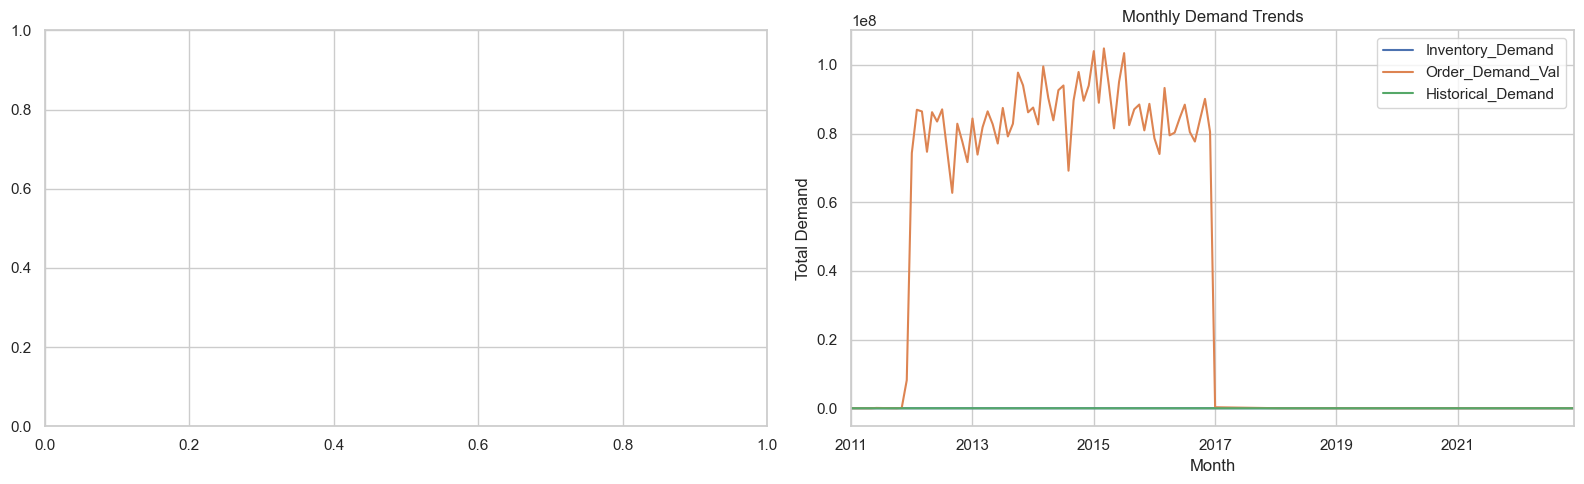

In [55]:
# Plot only the missing data and monthly demand trend to reduce memory load
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 2. Monthly Demand Trend
monthly_demand.plot(ax=axes[1])
axes[1].set_title("Monthly Demand Trends")
axes[1].set_ylabel("Total Demand")
axes[1].set_xlabel("Month")

plt.tight_layout()
plt.show()
